In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
titanic_train=pd.read_csv("/kaggle/input/titanic/train.csv")

In [81]:
titanic_test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [46]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [82]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [47]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


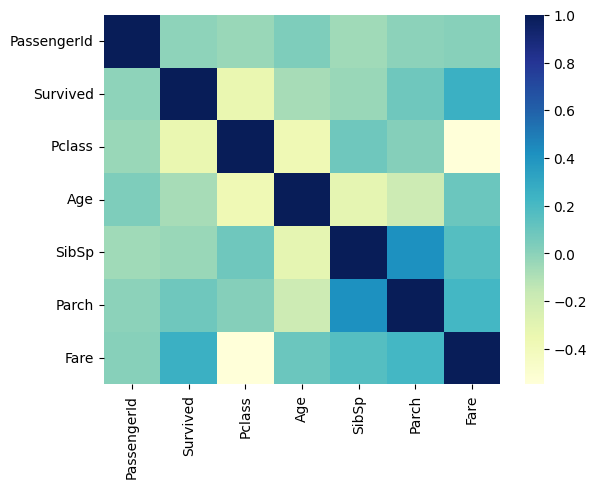

In [48]:
import seaborn as sns 
numeric_columns = titanic_train.select_dtypes(include=[np.number])

# Create correlation heatmap
sns.heatmap(numeric_columns.corr(), cmap="YlGnBu")
plt.show()

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2)
# we want the features Surivied, Pclass and Sex to be equally distributed in train and test
for train_idx, test_idx in split.split(titanic_train,titanic_train[['Survived','Pclass','Sex']]):
    train_data=titanic_train.loc[train_idx]
    test_data=titanic_train.loc[test_idx]
    



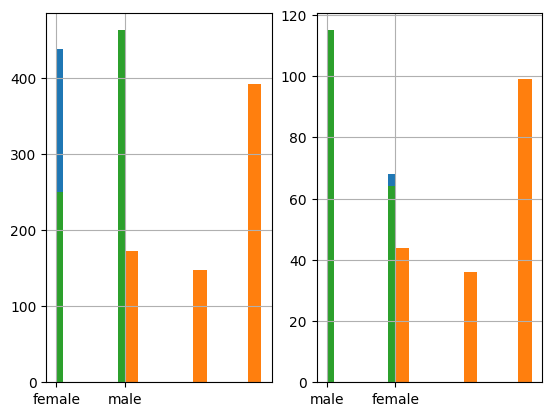

In [50]:
plt.subplot(1,2,1)
train_data['Survived'].hist()
train_data['Pclass'].hist()
train_data['Sex'].hist()
plt.subplot(1,2,2)
test_data['Survived'].hist()
test_data['Pclass'].hist()
test_data['Sex'].hist()
plt.show()

The distribution shows equal distribution of data in test and train 


In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 777 to 547
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          566 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [54]:
print(train_data[train_data['PassengerId']==322])

     PassengerId  Survived  Pclass              Name   Sex   Age  SibSp  \
321          322         0       3  Danoff, Mr. Yoto  male  27.0      0   

     Parch  Ticket    Fare Cabin Embarked  
321      0  349219  7.8958   NaN        S  


## Handling Null Numerical Values

In [55]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the 'Age' column 
train_data['Age'] = imputer.fit_transform(train_data[['Age']])

In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 777 to 547
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [72]:
test_data['Age']= imputer.fit_transform(test_data[['Age']])

In [73]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 104 to 68
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Name         179 non-null    object 
 4   Sex          179 non-null    object 
 5   Age          179 non-null    float64
 6   SibSp        179 non-null    int64  
 7   Parch        179 non-null    int64  
 8   Ticket       179 non-null    object 
 9   Fare         179 non-null    float64
 10  Cabin        39 non-null     object 
 11  Embarked     178 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.2+ KB


In [85]:
titanic_train['Age']=imputer.fit_transform(titanic_train[['Age']])
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [94]:
titanic_test['Age']= imputer.fit_transform(titanic_test[['Age']])

## One Hot Encoding Categoical Features

In [57]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Embarked', 'Sex']
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical features
encoded_data = encoder.fit_transform(train_data[categorical_features])

# Convert the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Embarked', 'Sex']))

# Concatenate the encoded features with the original DataFrame
train_data=pd.concat([train_data.reset_index(drop=True),encoded_df.reset_index(drop=True)], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Sex_female,Sex_male
0,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.000000,0,0,364516,12.475,NaN,S,0.0,0.0,1.0,0.0,1.0,0.0
1,90,0,3,"Celotti, Mr. Francesco",male,24.000000,0,0,343275,8.050,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
2,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,29.796979,0,0,111427,26.550,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
3,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.500,A6,S,0.0,0.0,1.0,0.0,0.0,1.0
4,656,0,2,"Hickman, Mr. Leonard Mark",male,24.000000,2,0,S.O.C. 14879,73.500,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0


In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   712 non-null    int64  
 1   Survived      712 non-null    int64  
 2   Pclass        712 non-null    int64  
 3   Name          712 non-null    object 
 4   Sex           712 non-null    object 
 5   Age           712 non-null    float64
 6   SibSp         712 non-null    int64  
 7   Parch         712 non-null    int64  
 8   Ticket        712 non-null    object 
 9   Fare          712 non-null    float64
 10  Cabin         165 non-null    object 
 11  Embarked      711 non-null    object 
 12  Embarked_C    712 non-null    float64
 13  Embarked_Q    712 non-null    float64
 14  Embarked_S    712 non-null    float64
 15  Embarked_nan  712 non-null    float64
 16  Sex_female    712 non-null    float64
 17  Sex_male      712 non-null    float64
dtypes: float64(8), int64(5), objec

In [74]:
encoded_test = encoder.fit_transform(test_data[categorical_features])

# Convert the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['Embarked', 'Sex']))

# Concatenate the encoded features with the original DataFrame
test_data=pd.concat([test_data.reset_index(drop=True),encoded_df.reset_index(drop=True)], axis=1)
test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Sex_female,Sex_male
0,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
1,845,0,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
2,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
3,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0.0,0.0,1.0,0.0,0.0,1.0
4,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C,1.0,0.0,0.0,0.0,1.0,0.0


In [87]:
encoded_titanic = encoder.fit_transform(titanic_train[categorical_features])

# Convert the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_titanic, columns=encoder.get_feature_names_out(['Embarked', 'Sex']))

# Concatenate the encoded features with the original DataFrame
titanic_train=pd.concat([titanic_train.reset_index(drop=True),encoded_df.reset_index(drop=True)], axis=1)
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,1.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0


In [95]:
encoded_titanic_test = encoder.fit_transform(titanic_test[categorical_features])

# Convert the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_titanic_test, columns=encoder.get_feature_names_out(['Embarked', 'Sex']))

# Concatenate the encoded features with the original DataFrame
titanic_test=pd.concat([titanic_test.reset_index(drop=True),encoded_df.reset_index(drop=True)], axis=1)
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,1.0,0.0,0.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0,0.0,1.0,1.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,1.0,0.0,0.0,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,0.0,1.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0,0.0,1.0,1.0,0.0


In [59]:
train_data= train_data.drop(["Embarked","Sex","Cabin","Name","Ticket","Embarked_nan"],axis=1)

In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Embarked_C   712 non-null    float64
 8   Embarked_Q   712 non-null    float64
 9   Embarked_S   712 non-null    float64
 10  Sex_female   712 non-null    float64
 11  Sex_male     712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 66.9 KB


In [75]:
test_data= test_data.drop(["Embarked","Sex","Cabin","Name","Ticket","Embarked_nan"],axis=1)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Age          179 non-null    float64
 4   SibSp        179 non-null    int64  
 5   Parch        179 non-null    int64  
 6   Fare         179 non-null    float64
 7   Embarked_C   179 non-null    float64
 8   Embarked_Q   179 non-null    float64
 9   Embarked_S   179 non-null    float64
 10  Sex_female   179 non-null    float64
 11  Sex_male     179 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 16.9 KB


In [88]:
titanic_train= titanic_train.drop(["Embarked","Sex","Cabin","Name","Ticket","Embarked_nan"],axis=1)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked_C   891 non-null    float64
 8   Embarked_Q   891 non-null    float64
 9   Embarked_S   891 non-null    float64
 10  Sex_female   891 non-null    float64
 11  Sex_male     891 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 83.7 KB


In [99]:
titanic_test= titanic_test.drop(["Embarked","Sex","Cabin","Name","Ticket",],axis=1)


## Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
X=train_data.drop(['Survived'],axis=1)
Y=train_data['Survived']
scaler= StandardScaler()
xdata=scaler.fit_transform(X)
ydata=Y.to_numpy()

In [76]:
x_test=test_data.drop(['Survived'],axis=1)
y_test=test_data['Survived']
scaler= StandardScaler()
X_test=scaler.fit_transform(x_test)
Y_test=y_test.to_numpy()


In [90]:
x_final=titanic_train.drop(['Survived'],axis=1)
y_final=titanic_train['Survived']
scaler=StandardScaler()
x_train_final=scaler.fit_transform(x_final)
y_train_final=y_final.to_numpy()


## Building the Model

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier()
parameters={"n_estimators":[50,100,150,200], "max_depth":[None,5,10],"min_samples_split":[2,3,4]}
random_forest_grid=GridSearchCV(classifier, param_grid = parameters, cv=3, scoring="accuracy", return_train_score=True)
random_forest_grid.fit(xdata,ydata)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True, scoring='accuracy')

In [79]:
final_classifier= random_forest_grid.best_estimator_

In [80]:
final_classifier

RandomForestClassifier(min_samples_split=4, n_estimators=150)

In [77]:
final_classifier.score(X_test,Y_test)

0.8100558659217877

In [91]:
product_classifier = RandomForestClassifier()
parameters={"n_estimators":[50,100,150,200], "max_depth":[None,5,10],"min_samples_split":[2,3,4]}
random_forest_grid=GridSearchCV(product_classifier, param_grid = parameters, cv=3, scoring="accuracy", return_train_score=True)
random_forest_grid.fit(x_train_final,y_train_final)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200]},
             return_train_score=True, scoring='accuracy')

In [93]:
product_final_classifier=random_forest_grid.best_estimator_
product_final_classifier

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=150)

In [100]:
titanic_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [101]:
x_test_final=titanic_test
x_test_final=x_test_final.fillna(method="ffill")
scaler=StandardScaler()
x_data_final_test=scaler.fit_transform(x_test_final)

/tmp/ipykernel_34/2009365180.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x_test_final=x_test_final.fillna(method="ffill")


In [104]:
preds=product_final_classifier.predict(x_data_final_test)

In [105]:
preds


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [107]:
submission_df=pd.DataFrame(titanic_test['PassengerId'])
submission_df['Survived']=preds
submission_df.to_csv("submission.csv", index=False)

In [108]:
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
